In [1]:
import os
from gpuutils import GpuUtils
GpuUtils.allocate(gpu_count=1, framework='keras')
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

GPU 1  will be allocated


2023-07-04 14:40:47.968014: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-07-04 14:40:48.018843: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2023-07-04 14:40:48.020111: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-07-04 14:40:48.051168: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-07-04 14:40:48.067904: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-07-04 14:40:48.070976: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import Help_functions.data_manage as dm
from ConvAutoencoder import ConvAutoencoder
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras
from keras_flops import get_flops


from ConvAutoencoder_U_net import ConvAutoencoder_U_net

ModuleNotFoundError: No module named 'Help_functions'

In [3]:
data_url = '/home/halin/Autoencoder/Data/'
x_test, y_test, smask_test, signal, noise, std, mean = dm.load_data(all_signals=False, data_path=data_url, small_test_set=1000)

In [11]:
filters = [50,25] #filter in layers
conv_in_row = 2
layers = len(filters)
activation_function = 'relu'
latent_size = 2
kernel = 3
last_activation_function = 'tanh'
learning_rate = 0.0001
epochs = 1000
test_run = False
plot=True
batch=1024
verbose=1
fpr=0.05
folder = 117
data_url = '/home/halin/Autoencoder/Data/'
 
model_number = 1
model_name = f'CNN_{folder}_model_{model_number}'
folder_path = '/home/halin/Autoencoder/Models/'
save_path = folder_path + model_name[:7] +'/'+ model_name



In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0001) 
autoencoder.compile(
      loss = 'mse',
      optimizer = adam,
      metrics = ['mse','mae','mape'] )
print(autoencoder.summary())  

In [ ]:
x_train, smask_train, y_train = dm.create_data(signal=signal, noise=noise, test_run=test_run)      
trained_autoencoder = cm.train_autoencoder(model=autoencoder, x_train=x_train, epochs=epochs, batch=batch, verbose=verbose)


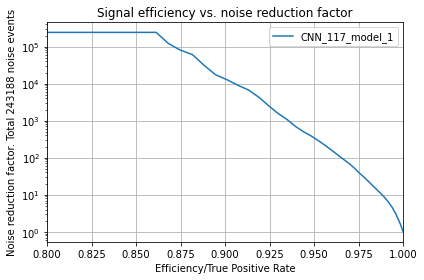

/home/halin/Autoencoder/Code/plot_functions.py:447: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


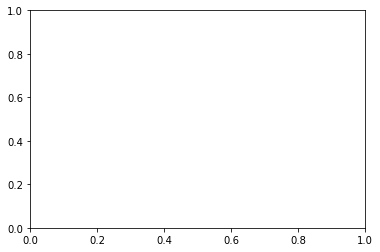

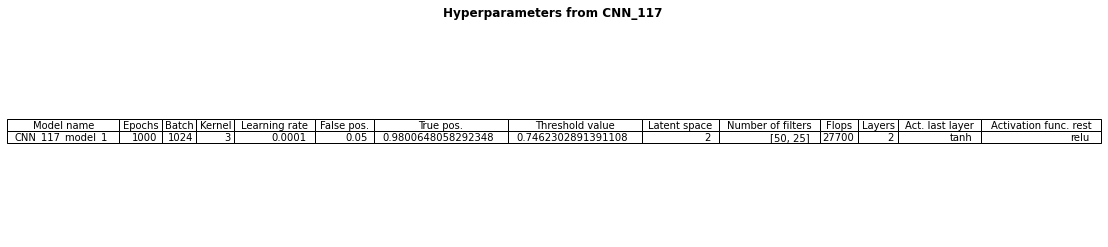

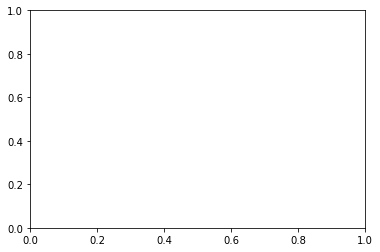

In [19]:
flops = get_flops(autoencoder)
if plot:
  pf.loss_plot(save_path, trained_autoencoder)
signal_loss, noise_loss = pf.prep_loss_values(autoencoder,x_test,smask_test)
bins = pf.hist(save_path, signal_loss, noise_loss, plot=plot)
threshold_value, tpr, fpr, tnr, fnr, noise_reduction_factors, true_pos_array = pf.noise_reduction_curve_single_model(model_name=model_name, save_path=save_path, x_test=x_test, smask_test=smask_test, fpr=fpr, plot=plot, signal_loss=signal_loss, noise_loss=noise_loss)

results = pd.DataFrame(columns=['Model name',
                                'Epochs',
                                'Batch', 
                                'Kernel', 
                                'Learning rate', 
                                'False pos.', 
                                'True pos.', 
                                'Threshold value', 
                                'Latent space', 
                                'Number of filters', 
                                'Flops',
                                'Layers', 
                                'Noise reduction',
                                'True pos. array',
                                'Signal loss',
                                'Noise loss',
                                'Act. last layer',
                                'Activation func. rest'])

results = results.append({'Model name': model_name,
            'Epochs':epochs,   
            'Batch': batch, 
            'Kernel':kernel, 
            'Learning rate':learning_rate, 
            'False pos.':fpr, 
            'True pos.':tpr, 
            'Threshold value':threshold_value, 
            'Latent space':latent_size, 
            'Number of filters':filters, 
            'Flops':flops,
            'Layers':layers, 
            'Noise reduction':noise_reduction_factors,
            'True pos. array':true_pos_array,
            'Signal loss':signal_loss,
            'Noise loss':noise_loss,
            'Act. last layer':last_activation_function,
            'Activation func. rest':activation_function},
            ignore_index=True)
results = pd.DataFrame(results) 
results.to_csv(folder_path + model_name[:7] + '/results.csv')  
pf.plot_table(folder_path + model_name[:7], headers=['Model name',
                                'Epochs',
                                'Batch', 
                                'Kernel', 
                                'Learning rate', 
                                'False pos.', 
                                'True pos.', 
                                'Threshold value', 
                                'Latent space', 
                                'Number of filters', 
                                'Flops',
                                'Layers',
                                'Act. last layer',
                                'Activation func. rest'])  
print()                   